In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform=transforms.ToTensor()
train_data=datasets.MNIST(root='Data',train=True,transform=transform,download=True)
test_data=datasets.MNIST(root='Data',train=False,transform=transform,download=True)

In [5]:
train_set=DataLoader(train_data,batch_size=10,shuffle=True)
test_set=DataLoader(test_data,batch_size=10,shuffle=False)

In [6]:
class CNN(nn.Module):
    def __init__(self,layer=[120,84]):
        super().__init__()
        layers= [nn.Conv2d(1, 6, 3, 1),
                 nn.ReLU(),
                 nn.MaxPool2d(2, 2),
                 nn.Conv2d(6, 16, 3, 1),
                 nn.ReLU(),
                 nn.MaxPool2d(2, 2)]
        self.layers=nn.Sequential(*layers)
        self.fc1=nn.Linear(5*5*16,layer[0])
        self.fc2=nn.Linear(layer[0],layer[1])
        self.fc3=nn.Linear(layer[1],10)
    def forward(self, x):
        x=self.layers(x)
        x=x.view(-1,5*5*16)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [19]:
model=CNN()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [20]:
import time
start=time.time()

epoch=3
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epoch):
    i=i+1
    train_count=0
    test_count=0
    for b,(x_train,y_train) in enumerate(train_set):
        b=b+1
        y_pred=model(x_train)
        loss=criterion(y_pred,y_train)

        count=(y_pred.argmax(1)==y_train).sum()
        train_count+=count

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600==0:
            print(f'epoch:{i} batch:{b} loss:{loss}')
    train_losses.append(loss)
    train_correct.append(train_count)
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_set):
            b=b+1
            y_pred=model(x_test)
            count=(y_pred.argmax(1)==y_test).sum()
            test_count+=count
        test_losses.append(criterion(y_pred,y_test))
        test_correct.append(test_count)
finish=time.time()
print(f'It takes {(finish-start)} seconds')

epoch:1 batch:600 loss:0.11686532199382782
epoch:1 batch:1200 loss:0.13348868489265442
epoch:1 batch:1800 loss:0.1400662362575531
epoch:1 batch:2400 loss:0.01961212232708931
epoch:1 batch:3000 loss:0.032312680035829544
epoch:1 batch:3600 loss:0.33361712098121643
epoch:1 batch:4200 loss:0.29184970259666443
epoch:1 batch:4800 loss:0.054161690175533295
epoch:1 batch:5400 loss:0.049982260912656784
epoch:1 batch:6000 loss:0.0007308960193768144
epoch:2 batch:600 loss:0.008207583799958229
epoch:2 batch:1200 loss:0.4996742308139801
epoch:2 batch:1800 loss:0.005007552914321423
epoch:2 batch:2400 loss:0.0021223544608801603
epoch:2 batch:3000 loss:0.004708290100097656
epoch:2 batch:3600 loss:0.03735702112317085
epoch:2 batch:4200 loss:0.0017001151572912931
epoch:2 batch:4800 loss:0.02551255188882351
epoch:2 batch:5400 loss:0.0013784408802166581
epoch:2 batch:6000 loss:0.0007983684772625566
epoch:3 batch:600 loss:0.40697336196899414
epoch:3 batch:1200 loss:0.012385845184326172
epoch:3 batch:1800 l

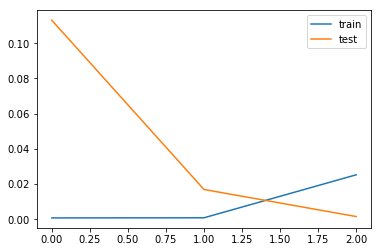

In [21]:
plt.plot(train_losses,label='train')
plt.plot(test_losses,label='test')
plt.legend()
plt.show()

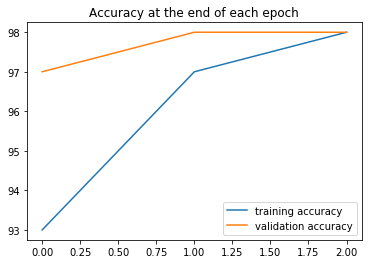

In [22]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [29]:
accuracy=test_correct[-1].item()*100/len(test_data)
accuracy

98.02

In [32]:
print(np.arange(10))
print(confusion_matrix(y_pred.argmax(1).reshape(-1),y_test.reshape(-1)))

[0 1 2 3 4 5 6 7 8 9]
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])


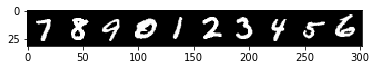

In [42]:
print(y_test)
im=make_grid([item for item in x_test],10)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [43]:
im.size()

torch.Size([3, 32, 302])

In [45]:
np.transpose(im.numpy(), (1, 2, 0)).shape

(32, 302, 3)